In [2]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.1 MB/s eta 0:00:00


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NvHkaNk0UepsPtmn2wZZ")
project = rf.workspace("syed-burhan-ahmed-ratws").project("cv-project-part-2")
version = project.version(4)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to CV-project-Part-2-4 in yolov11:: 100%|██████████| 594/594 [00:00<00:00, 11649.75it/s]


In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NvHkaNk0UepsPtmn2wZZ")
project = rf.workspace("marydhel-compaero").project("female-or-male")
version = project.version(3)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Female-or-Male-3 in yolov11:: 100%|██████████| 10650/10650 [00:01<00:00, 6962.30it/s]


In [6]:
import os
import shutil
import yaml

def merge_datasets_and_yaml(sources, dest):
    splits = ['train', 'valid', 'test']
    subdirs = ['images', 'labels']

    os.makedirs(dest, exist_ok=True)
    all_class_names = set()

    for split in splits:
        for sub in subdirs:
            dest_dir = os.path.join(dest, split, sub)
            os.makedirs(dest_dir, exist_ok=True)
            for src in sources:
                src_dir = os.path.join(src, split, sub)
                if os.path.exists(src_dir):
                    for fname in os.listdir(src_dir):
                        src_file = os.path.join(src_dir, fname)
                        dest_file = os.path.join(dest_dir, fname)
                        if os.path.exists(dest_file):
                            base, ext = os.path.splitext(fname)
                            new_name = f"{base}_{os.path.basename(src)}{ext}"
                            dest_file = os.path.join(dest_dir, new_name)
                        shutil.copy2(src_file, dest_file)

    # Merge class names from all YAMLs
    for src in sources:
        yaml_path = os.path.join(src, "data.yaml")
        if os.path.exists(yaml_path):
            with open(yaml_path, 'r') as f:
                data = yaml.safe_load(f)
                all_class_names.update(data.get("names", []))

    all_class_names = sorted(list(all_class_names))
    merged_yaml = {
        'train': os.path.join(dest, 'train', 'images'),
        'val': os.path.join(dest, 'valid', 'images'),
        'test': os.path.join(dest, 'test', 'images'),
        'nc': len(all_class_names),
        'names': all_class_names
    }

    with open(os.path.join(dest, 'data.yaml'), 'w') as f:
        yaml.dump(merged_yaml, f)

    print(f"✅ Merged dataset created at: {dest}")
    print(f"✅ Merged data.yaml includes {len(all_class_names)} classes: {all_class_names}")

# Example usage:
dataset1_path = '/content/CV-project-Part-2-4'
#dataset2_path = '/kaggle/working/Female-or-Male-3'
dataset2_path = '/content/Female-or-Male-3'
merged_path   = '/content/merged_dataset'


# merge_datasets_and_yaml([dataset1_path, dataset2_path, dataset3_path], merged_path)

merge_datasets_and_yaml([dataset1_path, dataset2_path], merged_path)



✅ Merged dataset created at: /content/merged_dataset
✅ Merged data.yaml includes 2 classes: ['Female', 'Male']


In [7]:
def write_clean_yaml(output_dir):
    yaml_content = """train: ../train/images
val: ../valid/images
test: ../test/images

nc: 2
names: ['Female', 'Male']
"""
    output_path = os.path.join(output_dir, "data.yaml")

    with open(output_path, 'w') as f:
        f.write(yaml_content)

    print(f"✅ data.yaml saved at: {output_path}")

# Example usage
output_folder = "/content/merged_dataset"  # Change this as needed
write_clean_yaml(output_folder)


✅ data.yaml saved at: /content/merged_dataset/data.yaml


In [5]:
import shutil
shutil.rmtree('/content/CV-project-Part-2-5')

In [8]:
from ultralytics import YOLO

In [21]:

# Path to your data.yaml file
data_yaml_path = '/content/merged_dataset/data.yaml'

yolo_model = YOLO('/content/yolo11n.pt')
# model.model.head.reset_class(nc=2)

# # Access the detection head (last module in the model's module list)
# head = yolo_model.model.model[-1]

# # Change number of output classes to 2 (male, female)
# head.nc = 2


In [22]:
# # Freeze all layers except the detection head
# for param in yolo_model.model.model[:-1].parameters():
#     param.requires_grad = False
# for param in yolo_model.model.model[-1].parameters():
#     param.requires_grad = True

# Train for 30 epochs
results = yolo_model.train(
    data=data_yaml_path,
    epochs=50,
    imgsz=250,
    batch=16,
    # weight_decay=0.0005,
    patience=20,
    # optimizer='AdamW',
    # lr0=0.001,
    name='face-gender-detection',
    project='/content/yolo_runs',
    verbose=True,
    device='cuda',
    save=True
)

Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/merged_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=250, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=face-gender-detection3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=

train: Scanning /content/merged_dataset/train/labels.cache... 4917 images, 123 backgrounds, 0 corrupt: 100%|██████████| 4917/4917 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 190.7±90.5 MB/s, size: 8.5 KB)


val: Scanning /content/merged_dataset/valid/labels.cache... 444 images, 7 backgrounds, 0 corrupt: 100%|██████████| 444/444 [00:00<?, ?it/s]


Plotting labels to /content/yolo_runs/face-gender-detection3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to /content/yolo_runs/face-gender-detection3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.857G      1.146      1.687      1.311         10        256: 100%|██████████| 308/308 [00:54<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.68it/s]

                   all        444        440      0.823      0.897       0.92      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.926G      1.128      1.134      1.273         12        256: 100%|██████████| 308/308 [00:50<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.22it/s]

                   all        444        440      0.726      0.858       0.89      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.926G      1.121      1.034      1.278         15        256: 100%|██████████| 308/308 [00:48<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.85it/s]

                   all        444        440      0.852      0.843      0.918       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.926G      1.115     0.9888      1.265         12        256: 100%|██████████| 308/308 [00:48<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.17it/s]

                   all        444        440      0.878      0.923       0.95      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.926G      1.084     0.9281      1.269         11        256: 100%|██████████| 308/308 [00:47<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.00it/s]


                   all        444        440      0.859      0.904      0.912      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.926G      1.056     0.8926      1.239         13        256: 100%|██████████| 308/308 [00:48<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.97it/s]

                   all        444        440      0.866      0.882      0.946      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.926G       1.05     0.8758      1.248         11        256: 100%|██████████| 308/308 [00:47<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.82it/s]

                   all        444        440      0.763       0.85      0.896      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.926G      1.032       0.84      1.238         15        256: 100%|██████████| 308/308 [00:48<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.11it/s]

                   all        444        440      0.906      0.903       0.95      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.926G      1.015      0.822      1.227         13        256: 100%|██████████| 308/308 [00:48<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.80it/s]

                   all        444        440      0.879      0.935      0.954      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.926G      1.007     0.8067      1.222         10        256: 100%|██████████| 308/308 [00:48<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.81it/s]

                   all        444        440      0.926      0.906      0.954      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.926G     0.9885     0.7783       1.21         13        256: 100%|██████████| 308/308 [00:48<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.89it/s]

                   all        444        440       0.85      0.908      0.944      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.926G     0.9849     0.7712      1.215         13        256: 100%|██████████| 308/308 [00:48<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.10it/s]

                   all        444        440      0.875      0.833      0.925      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.926G     0.9781     0.7493      1.207         10        256: 100%|██████████| 308/308 [00:49<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.08it/s]

                   all        444        440      0.943      0.922      0.959       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.926G     0.9734     0.7489      1.206          6        256: 100%|██████████| 308/308 [00:46<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.75it/s]

                   all        444        440      0.892      0.912      0.951      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.926G     0.9678      0.733      1.213         14        256: 100%|██████████| 308/308 [00:45<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.64it/s]

                   all        444        440        0.9      0.939      0.959      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.926G     0.9608     0.7288      1.207         16        256: 100%|██████████| 308/308 [00:46<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.25it/s]

                   all        444        440      0.877      0.906      0.948      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.926G     0.9541      0.715        1.2         11        256: 100%|██████████| 308/308 [00:46<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.47it/s]

                   all        444        440      0.863      0.909      0.944       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.926G     0.9443     0.7069      1.197         11        256: 100%|██████████| 308/308 [00:46<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.50it/s]

                   all        444        440      0.924      0.908      0.961      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.926G     0.9433     0.7146      1.195         14        256: 100%|██████████| 308/308 [00:48<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.11it/s]


                   all        444        440      0.928      0.937      0.959      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.926G     0.9331     0.6924      1.195          8        256: 100%|██████████| 308/308 [00:47<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.15it/s]

                   all        444        440      0.907      0.954      0.966      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.926G     0.9422     0.6816      1.191         10        256: 100%|██████████| 308/308 [00:48<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.41it/s]

                   all        444        440      0.923       0.94      0.959      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.926G     0.9326     0.6756      1.189         13        256: 100%|██████████| 308/308 [00:47<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.96it/s]

                   all        444        440      0.932      0.919       0.96      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.926G     0.9196     0.6836      1.183         11        256: 100%|██████████| 308/308 [00:46<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.52it/s]

                   all        444        440      0.922      0.943      0.959      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.926G     0.9193     0.6578      1.185          8        256: 100%|██████████| 308/308 [00:46<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.49it/s]

                   all        444        440      0.928      0.913      0.961      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.926G     0.9112     0.6542      1.178         11        256: 100%|██████████| 308/308 [00:47<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.50it/s]

                   all        444        440      0.942      0.944      0.965      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.926G     0.9044     0.6513      1.175         14        256: 100%|██████████| 308/308 [00:47<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.32it/s]

                   all        444        440      0.928      0.922      0.955      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.926G     0.8948     0.6426      1.173         12        256: 100%|██████████| 308/308 [00:46<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.38it/s]

                   all        444        440      0.911      0.911      0.953      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.926G     0.8851     0.6298      1.168         16        256: 100%|██████████| 308/308 [00:46<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.14it/s]

                   all        444        440      0.927      0.913      0.956      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.926G     0.8858      0.639      1.165         13        256: 100%|██████████| 308/308 [00:47<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.26it/s]

                   all        444        440       0.94      0.936      0.965      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.926G     0.8765      0.613      1.166         11        256: 100%|██████████| 308/308 [00:46<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.63it/s]

                   all        444        440      0.932      0.919       0.96      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.926G     0.8673     0.6036      1.159         12        256: 100%|██████████| 308/308 [00:46<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.66it/s]

                   all        444        440      0.936      0.929      0.956      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.926G     0.8618     0.6023       1.16         14        256: 100%|██████████| 308/308 [00:47<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.20it/s]

                   all        444        440      0.925       0.93      0.955      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.926G     0.8578      0.605      1.157          8        256: 100%|██████████| 308/308 [00:46<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.53it/s]

                   all        444        440       0.94       0.94      0.966      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.926G     0.8512     0.5805      1.155         12        256: 100%|██████████| 308/308 [00:48<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.11it/s]

                   all        444        440      0.956      0.933      0.964      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.926G     0.8524      0.588      1.152         13        256: 100%|██████████| 308/308 [00:48<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.13it/s]

                   all        444        440      0.942      0.941       0.96      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.926G     0.8421     0.5736      1.147         12        256: 100%|██████████| 308/308 [00:48<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.89it/s]

                   all        444        440      0.924      0.957       0.96      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50     0.926G     0.8239     0.5692      1.133          9        256: 100%|██████████| 308/308 [00:48<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.18it/s]

                   all        444        440      0.946      0.938       0.96      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50     0.926G     0.8359      0.573      1.138         12        256: 100%|██████████| 308/308 [00:48<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.37it/s]

                   all        444        440      0.943      0.936      0.969      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50     0.926G     0.8268     0.5655       1.14         10        256: 100%|██████████| 308/308 [00:48<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.07it/s]

                   all        444        440      0.925      0.933      0.957      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50     0.926G     0.8147       0.56      1.132         12        256: 100%|██████████| 308/308 [00:48<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.94it/s]

                   all        444        440      0.946      0.934      0.966      0.721


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50     0.926G     0.7099     0.3746      1.059          5        256: 100%|██████████| 308/308 [00:48<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.99it/s]

                   all        444        440      0.943       0.95      0.966      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50     0.926G     0.6884     0.3564      1.041          5        256: 100%|██████████| 308/308 [00:48<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.10it/s]

                   all        444        440       0.94       0.94      0.955      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50     0.926G     0.6742     0.3364      1.037          5        256: 100%|██████████| 308/308 [00:47<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.15it/s]

                   all        444        440      0.932      0.932       0.96      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50     0.926G     0.6647     0.3333      1.032          5        256: 100%|██████████| 308/308 [00:48<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.08it/s]

                   all        444        440      0.937      0.933      0.948       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50     0.926G     0.6598     0.3276      1.029          5        256: 100%|██████████| 308/308 [00:48<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.16it/s]

                   all        444        440      0.948       0.93      0.958      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50     0.926G      0.644     0.3131      1.012          5        256: 100%|██████████| 308/308 [00:47<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.36it/s]

                   all        444        440      0.947      0.927      0.953      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50     0.926G     0.6334      0.313      1.015          5        256: 100%|██████████| 308/308 [00:46<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.12it/s]

                   all        444        440      0.939      0.941      0.956      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50     0.926G     0.6171     0.2998     0.9982          5        256: 100%|██████████| 308/308 [00:45<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.60it/s]

                   all        444        440      0.938      0.941      0.955      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50     0.926G     0.6118     0.3007     0.9988          5        256: 100%|██████████| 308/308 [00:45<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.89it/s]

                   all        444        440      0.936      0.937      0.957      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50     0.926G     0.6091     0.2972     0.9949          5        256: 100%|██████████| 308/308 [00:46<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.13it/s]

                   all        444        440      0.943      0.941      0.958      0.714



50 epochs completed in 0.705 hours.
Optimizer stripped from /content/yolo_runs/face-gender-detection3/weights/last.pt, 5.4MB
Optimizer stripped from /content/yolo_runs/face-gender-detection3/weights/best.pt, 5.4MB

Validating /content/yolo_runs/face-gender-detection3/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.54it/s]


                   all        444        440       0.94      0.939      0.966      0.726
                Female        239        241      0.943      0.969      0.978      0.747
                  Male        198        199      0.936       0.91      0.955      0.704
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to /content/yolo_runs/face-gender-detection3


In [25]:
import shutil

# Path to the folder you want to zip
folder_to_zip = "/content/yolo_runs/face-gender-detection3"
zip_output_path = "/content/yolo_runs/face-gender-detection3.zip"

# Create ZIP file
shutil.make_archive(base_name=zip_output_path.replace(".zip", ""), format='zip', root_dir=folder_to_zip)

print(f"✅ Zipped folder saved as: {zip_output_path}")


✅ Zipped folder saved as: /content/yolo_runs/face-gender-detection3.zip


In [15]:
def detect_and_classify_faces(image_path, output_path='annotated_output.jpg'):
    # Read image
    img_cv = cv2.imread(image_path)
    if img_cv is None:
        raise FileNotFoundError(f"❌ Could not read image: {image_path}")

    img_height, img_width = img_cv.shape[:2]
    img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

    # Run YOLOv8 face detection
    results = yolo_model.predict(
    img_rgb,
    conf=0.1,
    iou=0.5,
    imgsz=1024,
    verbose=False,
    agnostic_nms=True
)

    boxes = results[0].boxes

    if boxes is None or len(boxes) == 0:
        print("❌ No faces detected.")
        return

    print(f"\n✅ Detected {len(boxes)} face(s):\n")

    for i in range(len(boxes)):
        x1, y1, x2, y2 = boxes.xyxy[i].cpu().numpy().astype(int)
        x1, y1, x2, y2 = max(0, x1), max(0, y1), min(img_width, x2), min(img_height, y2)

        gender = int(boxes.cls[i])
        confidence = float(boxes.conf[i])
        color = GENDER_COLORS.get(gender, (255, 255, 255))

        face = img_rgb[y1:y2, x1:x2]
        if face.size == 0:
            continue

        # --- Face Classification ---
        transformed = transform(image=face)
        face_tensor = transformed['image'].unsqueeze(0).to(DEVICE)

        with torch.no_grad():
            output = classifier_model(face_tensor)
            pred_class = int(torch.argmax(output, dim=1).item())

        label = FACE_CLASSES.get(pred_class, 'Unknown')
        gender_text = gender_map.get(gender, 'Unknown')
        text = f"{gender_text}, {label}, {confidence:.2f}"

        print(f"Face {i+1}: {text}")

        # --- Draw box + label ---
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.5
        thickness = 1
        margin = 4
        (text_w, text_h), _ = cv2.getTextSize(text, font, font_scale, thickness)
        text_x = max(min(x1, img_width - text_w - margin), margin)
        text_y = y1 - margin if y1 - text_h - margin > margin else y2 + text_h + margin
        text_y = min(text_y, img_height - margin)

        # Draw background + text
        cv2.rectangle(img_cv,
                      (text_x - margin, text_y - text_h - margin),
                      (text_x + text_w + margin, text_y + margin),
                      color, -1)
        cv2.putText(img_cv, text, (text_x, text_y),
                    font, font_scale, (255, 255, 255), thickness)

        # Draw bounding box
        cv2.rectangle(img_cv, (x1, y1), (x2, y2), color, 1)

    # Save and display
    cv2.imwrite(output_path, img_cv)
    print(f"\n📸 Saved annotated image to: {output_path}")
    cv2_imshow(img_cv)

In [23]:
#!pip install ultralytics
import os
import cv2
import zipfile
import shutil
import torch
import timm
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

from ultralytics import YOLO
from google.colab.patches import cv2_imshow
from torchvision import transforms, datasets
from torchvision.models import efficientnet_b0
from torch.utils.data import DataLoader, random_split, Subset
from torch.optim.lr_scheduler import CosineAnnealingLR
import os
import cv2
import torch
import numpy as np
from PIL import Image
from tqdm import tqdm
from ultralytics import YOLO
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torchvision.models import efficientnet_v2_s, EfficientNet_V2_S_Weights
import torch.nn as nn

# --- CONFIGURATION ---
TEST_DIR = '/content/test_img'
YOLO_MODEL_PATH = '/content/best.pt'
CLASSIFIER_MODEL_PATH = '/content/CV_Project_Part1.pth'
OUTPUT_FOLDER = '/content/annotated prediction'
IMAGE_SIZE = (224, 224)
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# --- 1. Load YOLO Model ---
# yolo_model = YOLO(YOLO_MODEL_PATH)

# --- 2. Define and Load Classifier Model ---
def create_model():
    model = efficientnet_v2_s(weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1)
    in_f = model.classifier[1].in_features
    model.classifier = nn.Sequential(
        nn.Dropout(0.5),
        nn.Linear(in_f, 512),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(512, 16)  # 15 celebrities + 1 for others
    )
    return model

classifier_model = create_model().to(DEVICE)
classifier_model.load_state_dict(torch.load(CLASSIFIER_MODEL_PATH, map_location=DEVICE))
classifier_model.eval()

# --- 3. Preprocessing for classifier ---
transform = A.Compose([
    A.Resize(*IMAGE_SIZE),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2()
])

# === Class Labels ===
FACE_CLASSES = {
    0:  "Iqra Aziz",
    1:  "Humayun Saeed",
    2:  "Kubra Khan",
    3:  "Mahira Khan",
    4:  "Naseem Shah",
    5:  "Noman Ijaz",
    6:  "Neelam Muneer",
    7:  "Ramsha Khan",
    8:  "Sajal Aly",
    9:  "Shaheen Afridi",
    10: "Atif Aslam",
    11: "Fahad Mustafa",
    12: "Fawad Khan",
    13: "Hamza Ali Abbasi",
    14: "Hania Amir",
    -1: "Others"
}
gender_map = {0: "Female", 1: "Male"}
GENDER_COLORS = {0: (0, 255, 0), 1: (255, 0, 0)}  # Green: Female, Blue: Male




✅ Detected 7 face(s):

Face 1: Male, Unknown, 0.69
Face 2: Female, Kubra Khan, 0.65
Face 3: Female, Unknown, 0.62
Face 4: Female, Unknown, 0.61
Face 5: Male, Unknown, 0.51
Face 6: Female, Hania Amir, 0.40
Face 7: Male, Noman Ijaz, 0.10

📸 Saved annotated image to: annotated_output.jpg


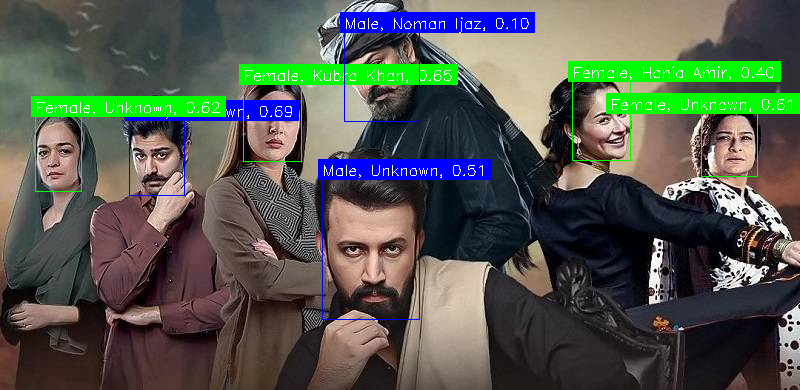

In [24]:
detect_and_classify_faces("/content/WhatsApp Image 2025-07-09 at 15.55.07_a774f1fb.jpg")

In [30]:
import zipfile
import os

def unzip_file(zip_path, extract_to):
    """
    Unzips a zip file to the specified directory.

    Args:
        zip_path (str): Path to the .zip file.
        extract_to (str): Directory where files will be extracted.
    """
    if not os.path.exists(zip_path):
        raise FileNotFoundError(f"Zip file not found: {zip_path}")
    if not os.path.exists(extract_to):
        os.makedirs(extract_to)

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Extracted all files to {extract_to}")


In [31]:
unzip_file("/content/Test Images.zip","/content/test_images")

Extracted all files to /content/test_images


In [37]:
import os
import cv2
import torch
import numpy as np
from tqdm import tqdm
from ultralytics import YOLO
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torchvision.models import efficientnet_v2_s, EfficientNet_V2_S_Weights
import torch.nn as nn

# --- CONFIGURATION ---
TEST_DIR = '/content/check'
YOLO_MODEL_PATH = '/kaggle/working/yolo_runs/face-gender-detection/weights/best.pt'
CLASSIFIER_MODEL_PATH = '/content/CV_Project_Part1.pth'
OUTPUT_FOLDER = '/content/annotated_predictions'
IMAGE_SIZE = (224, 224)
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# --- 1. Load YOLOv8 Model ---
# yolo_model = YOLO(YOLO_MODEL_PATH)

# --- 2. Define and Load Classifier Model ---
def create_model():
    model = efficientnet_v2_s(weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1)
    in_f = model.classifier[1].in_features
    model.classifier = nn.Sequential(
        nn.Dropout(0.5),
        nn.Linear(in_f, 512),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(512, 16)  # 15 celebrities + 1 for others
    )
    return model

classifier_model = create_model().to(DEVICE)
classifier_model.load_state_dict(torch.load(CLASSIFIER_MODEL_PATH, map_location=DEVICE))
classifier_model.eval()

# --- 3. Preprocessing for classifier ---
transform = A.Compose([
    A.Resize(*IMAGE_SIZE),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2()
])

# --- 4. Class and Gender Mapping ---
class_names = {
    0:  "Iqra Aziz", 1:  "Humayun Saeed", 2:  "Kubra Khan", 3:  "Mahira Khan",
    4:  "Naseem Shah", 5:  "Noman Ijaz", 6:  "Neelam Muneer", 7:  "Ramsha Khan",
    8:  "Sajal Aly", 9:  "Shaheen Afridi", 10: "Atif Aslam", 11: "Fahad Mustafa",
    12: "Fawad Khan", 13: "Hamza Ali Abbasi", 14: "Hania Amir", -1: "Other"
}
gender_map = {0: "Female", 1: "Male"}
GENDER_COLORS = {0: (0, 255, 0), 1: (255, 0, 0)}

# --- 5. Batch Inference and Annotation ---
for fn in tqdm(os.listdir(TEST_DIR)):
    if not fn.lower().endswith(('.jpg', '.jpeg', '.png')):
        continue

    img_path = os.path.join(TEST_DIR, fn)
    img_cv = cv2.imread(img_path)
    if img_cv is None:
        print(f"Warning: Could not read image {fn}")
        continue
    img_height, img_width = img_cv.shape[:2]
    img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

    # YOLOv8 Inference with class-agnostic NMS
    results = yolo_model.predict(
        img_rgb, conf=0.1, iou=0.5, imgsz=1024, verbose=False, agnostic_nms=True
    )
    boxes = results[0].boxes

    if boxes is None or len(boxes) == 0:
        print(f"No faces detected in {fn}.")
        cv2.imwrite(os.path.join(OUTPUT_FOLDER, fn), img_cv)
        continue

    for i in range(len(boxes)):
        x1, y1, x2, y2 = boxes.xyxy[i].cpu().numpy().astype(int)
        x1, y1, x2, y2 = max(0, x1), max(0, y1), min(img_width, x2), min(img_height, y2)
        gender = int(boxes.cls[i])
        color = GENDER_COLORS.get(gender, (255, 255, 255))

        face = img_rgb[y1:y2, x1:x2]
        if face.size == 0:
            continue

        # Preprocess and classify face
        transformed = transform(image=face)
        face_tensor = transformed['image'].unsqueeze(0).to(DEVICE)
        with torch.no_grad():
            output = classifier_model(face_tensor)
            pred_class = int(torch.argmax(output, dim=1).item())
        label = class_names.get(pred_class, 'Other')
        gender_text = gender_map.get(gender, 'Unknown')
        text = f"{gender_text}, {label}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.6
        thickness = 2

        # Use the top-left corner for text placement
        x_text, y_text = int(x1), int(y1)
        (text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, thickness)
        y_text = max(y_text - 10, text_height + 5)

        # Draw filled rectangle for text background
        cv2.rectangle(
            img_cv,
            (x_text, y_text - text_height - baseline),
            (x_text + text_width, y_text + baseline),
            (0, 255, 0) if gender == 0 else (255, 0, 0),
            thickness=cv2.FILLED
        )
        # Draw text
        cv2.putText(
            img_cv,
            text,
            (x_text, y_text),
            font,
            font_scale,
            (255, 255, 255),
            thickness
        )
        # Draw bounding box
        cv2.rectangle(
            img_cv,
            (x1, y1),
            (x2, y2),
            (0, 255, 0) if gender == 0 else (255, 0, 0),
            2
        )

    # Save annotated image
    out_path = os.path.join(OUTPUT_FOLDER, fn)
    cv2.imwrite(out_path, img_cv)

print(f"✅ Annotated images saved in: {OUTPUT_FOLDER}")


100%|██████████| 6/6 [00:00<00:00,  7.28it/s]

✅ Annotated images saved in: /content/annotated_predictions


In [39]:
import os
import cv2
import torch
import numpy as np
from PIL import Image
from tqdm import tqdm
from ultralytics import YOLO
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torchvision.models import efficientnet_v2_s, EfficientNet_V2_S_Weights
import torch.nn as nn

# --- CONFIGURATION ---
TEST_DIR = '/content/test_images'
YOLO_MODEL_PATH = '/content/yolo_runs/face-gender-detection3/weights/best.pt'
CLASSIFIER_MODEL_PATH = '/content/CV_Project_Part1.pth'
OUTPUT_FOLDER = '/content/annotated_predictions_finall'
IMAGE_SIZE = (224, 224)
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# --- 1. Load YOLO Model ---
yolo_model = YOLO(YOLO_MODEL_PATH)

# --- 2. Define and Load Classifier Model ---
def create_model():
    model = efficientnet_v2_s(weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1)
    in_f = model.classifier[1].in_features
    model.classifier = nn.Sequential(
        nn.Dropout(0.5),
        nn.Linear(in_f, 512),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(512, 16)  # 15 celebrities + 1 for others
    )
    return model

classifier_model = create_model().to(DEVICE)
classifier_model.load_state_dict(torch.load(CLASSIFIER_MODEL_PATH, map_location=DEVICE))
classifier_model.eval()

# --- 3. Preprocessing for classifier ---
transform = A.Compose([
    A.Resize(*IMAGE_SIZE),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2()
])

# --- 4. Class and Gender Mapping ---
class_names = {
    0:  "Iqra Aziz",
    1:  "Humayun Saeed",
    2:  "Kubra Khan",
    3:  "Mahira Khan",
    4:  "Naseem Shah",
    5:  "Noman Ijaz",
    6:  "Neelam Muneer",
    7:  "Ramsha Khan",
    8:  "Sajal Aly",
    9:  "Shaheen Afridi",
    10: "Atif Aslam",
    11: "Fahad Mustafa",
    12: "Fawad Khan",
    13: "Hamza Ali Abbasi",
    14: "Hania Amir",
    -1: "Others"
}
class_names[-1] = "Other"
gender_map = {0: "Female", 1: "Male"}

# --- 5. Inference Loop with Axis-Aligned Bounding Boxes ---
for fn in tqdm(os.listdir(TEST_DIR)):
    if not fn.lower().endswith(('.jpg', '.jpeg', '.png')):
        continue

    path = os.path.join(TEST_DIR, fn)
    img_cv = cv2.imread(path)
    if img_cv is None:
        print(f"Warning: Could not read image {fn}")
        continue
    img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

    results = yolo_model.predict(img_rgb, conf=0.5, verbose=False)
    boxes = results[0].boxes

    if boxes is not None:
        for i in range(len(boxes)):
            # Get bounding box coordinates (axis-aligned)
            x1, y1, x2, y2 = boxes.xyxy[i].cpu().numpy().astype(int)
            gender = int(boxes.cls[i])  # 0 or 1
            color = (0, 255, 0) if gender == 0 else (255, 0, 0)

            # Crop + Resize for classification
            face = img_rgb[y1:y2, x1:x2]
            if face.size == 0:
                continue
            face_pil = Image.fromarray(face).resize(IMAGE_SIZE, Image.LANCZOS)
            face_np = np.array(face_pil)
            face_tensor = transform(image=face_np)['image'].unsqueeze(0).to(DEVICE)

            # Classification
            with torch.no_grad():
                output = classifier_model(face_tensor)
                pred_class = output.argmax(dim=1).item()
                label = -1 if pred_class == 15 else pred_class

            # Annotation
            text = f"{gender_map[gender]}, {class_names[label]}"
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 0.6
            thickness = 2

            # Calculate text size and position
            (text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, thickness)
            text_y = y1 - 10
            if text_y - text_height < 0:
                text_y = y1 + text_height + 5

            # Draw bounding box
            cv2.rectangle(img_cv, (x1, y1), (x2, y2), color, 2)
            # Draw filled rectangle for text background
            cv2.rectangle(
                img_cv,
                (x1, text_y - text_height - baseline),
                (x1 + text_width, text_y + baseline),
                color,
                thickness=cv2.FILLED
            )
            # Draw text
            cv2.putText(
                img_cv,
                text,
                (x1, text_y),
                font,
                font_scale,
                (255, 255, 255),
                thickness
            )

    # Save the image with annotations
    out_path = os.path.join(OUTPUT_FOLDER, fn)
    cv2.imwrite(out_path, img_cv)

print(f"✅ Annotated images saved in: {OUTPUT_FOLDER}")


100%|██████████| 425/425 [00:22<00:00, 18.48it/s]

✅ Annotated images saved in: /content/annotated_predictions_finall


In [40]:
import shutil

# Path to the folder you want to zip
folder_to_zip = "/content/annotated_predictions_finall"
zip_output_path = "/content/annotated_predictions_finall.zip"

# Create ZIP file
shutil.make_archive(base_name=zip_output_path.replace(".zip", ""), format='zip', root_dir=folder_to_zip)

print(f"✅ Zipped folder saved as: {zip_output_path}")


✅ Zipped folder saved as: /content/annotated_predictions_finall.zip


In [42]:
import shutil

# Path to the folder you want to zip
folder_to_zip = "/content/annotated_predictions"
zip_output_path = "/content/annotated_predictions.zip"

# Create ZIP file
shutil.make_archive(base_name=zip_output_path.replace(".zip", ""), format='zip', root_dir=folder_to_zip)

print(f"✅ Zipped folder saved as: {zip_output_path}")


✅ Zipped folder saved as: /content/annotated_predictions.zip
